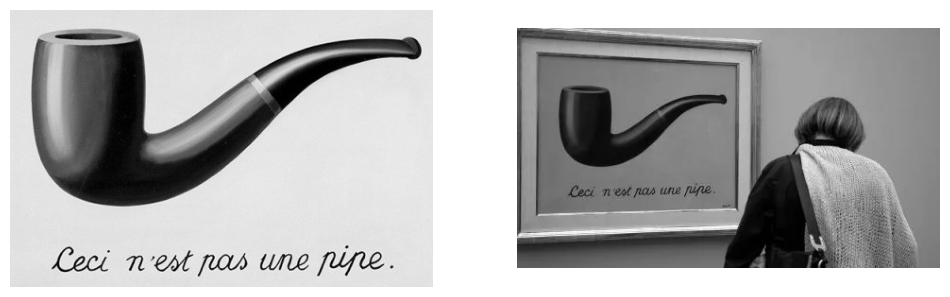

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#______________________
# 1. SIFT
#______________________

# La méthode repose sur SIFT (Scale-Invariant Feature Transform), un descripteur robuste aux
# changements d’échelle, d’orientation, de luminosité.
# SIFT extrait :
# 1. des points d’intérêt (keypoints),
# 2. un descripteur de 128 valeurs pour chaque point.
# Ces descripteurs permettent de comparer deux images.

# SIFT détecte des points “Features”. Pour chaque point, SIFT calcule un histogramme
# d’orientations de gradients, ce qui donne un vecteur (descripteur) qui servira pour la
# détection.

i = cv.imread('obj.jpg')
j = cv.imread('sce.jpg')

gray_i= cv.cvtColor(i,cv.COLOR_BGR2GRAY)
gray_j= cv.cvtColor(j,cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(gray_i, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_j, cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
#.2
# Détecter les points SIFT des deux images I et J en utilisant la fonction
# sift.detect(img_gray,None)

# sift.detect() function finds the keypoint in the images.
# Each keypoint is a special structure which has many attributes like its (x,y) coordinates,
# size of the meaningful neighbourhood, angle which specifies its orientation,
# response that specifies strength of keypoints etc.
sift = cv.SIFT_create()

kp_i = sift.detect(gray_i,None)
kp_j = sift.detect(gray_j,None)

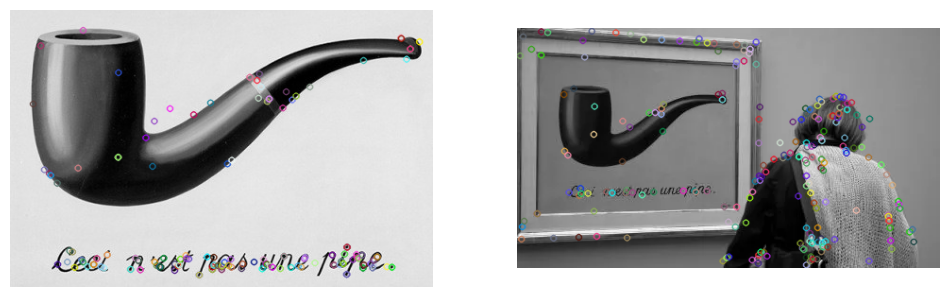

In [13]:
#.3
# Dessiner les keypoints SIFT des deux images puis afficher les. En utilisant la fonction
# cv.drawKeypoints(gray,kp,img)
i_kp=cv.drawKeypoints(gray_i,kp_i,i)
j_kp=cv.drawKeypoints(gray_j,kp_j,j)

#les images i j mrsoum 3lihom keypoints 
cv.imwrite('sift_keypoints_i.jpg',i_kp)
cv.imwrite('sift_keypoints_j.jpg',j_kp)


plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.imshow(i_kp, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(j_kp, cmap='gray')
plt.axis('off')
plt.show()


In [15]:
#.4
kp_i, des_i = sift.compute(gray_i, kp_i)
kp_j, des_j = sift.compute(gray_j, kp_j)

#NB : Vous pouvez appliquer la fonction sift.detectAndCompute() afin de détecter les points 
#SIFT et de calculer le descripteur SIFT en une opération 

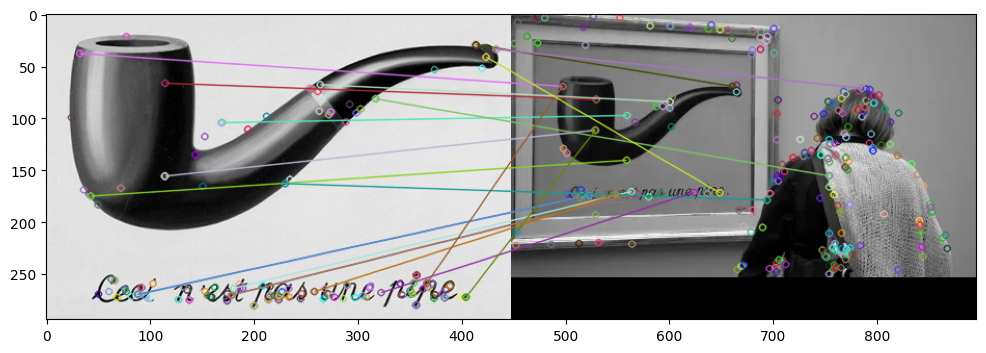

In [17]:

#______________________________________
# 2. Détection d’un objet par Matching
#______________________________________
# Une fois les descripteurs calculés. Nous procédons à l’appariement des descripteurs
# (matching) afin de retrouver l’occurrence de l’objet dans la scène.
# Le matching, est le fait de mettre en correspondance des features entre deux images : on
# regarde chaque point SIFT détecté dans la première image (objet) et on cherche le point qui
# lui correspond le plus dans l’image de la scène, afin de retrouver ou se trouve l’objet dans la
# scène.

# BFMatcher with default params 
#Brute-Force Matcher :
# Brute-Force matcher is simple. 
# It takes the descriptor of one feature in first set 
# and is matched with all other features in second set
# using some distance calculation. 
# And the closest one is returned.
bf = cv.BFMatcher()
 
# A partir des deux descripteurs calculés précedamment appliquer le matching afin de
# retrouver l’objet I dans l’image J.

#  we will use BFMatcher.knnMatch() to get k best matches. 
# In this example, we will take k=2 
# so that we can apply ratio test explained by D.Lowe in his paper.
# k correspond au nombre de
# "meilleurs matchs" à retourner pour chaque descripteur.

# Match descriptors.


matches = bf.knnMatch(des_i,des_j,k=2)

# matches est une liste de listes.
# Chaque élément correspond à un descripteur de des_i
# et contient ses k meilleurs matches dans des_j.
# Puisque k=2, chaque élément est une liste de 2 DMatch objets
# Contenu d’un objet DMatch

# Chaque DMatch contient :

# Attribut	Description
# queryIdx	Index du descripteur dans des_i (la "requête")
# trainIdx	Index du descripteur correspondant dans des_j (l’image "cible")
# imgIdx	Index de l’image cible (utile si tu compares plusieurs images)
# distance	Distance entre les deux descripteurs (SIFT : généralement euclidienne)



# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

#Dessiner le matching les résultats en utilisant la fonction : cv.drawMatchesKnn
# cv.drawMatchesKnn expects list of lists as matches.
img_matched = cv.drawMatchesKnn(i,kp_i,j,kp_j,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 

plt.figure(figsize=(12, 6))

plt.imshow(img_matched)
plt.show()
